In [10]:
import pyodbc
import pandas as pd
from pycaret.classification import setup, compare_models

print("All libraries imported successfully!")

All libraries imported successfully!


In [11]:
import pyodbc
import pandas as pd

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost;"        # default instance
    "DATABASE=LOAN_PORTFOLIO_DB;"
    "Trusted_Connection=yes"   # use Windows Authentication
)

In [12]:
customer_df = pd.read_sql("SELECT * FROM CUSTOMER_DETAILS", conn)
account_df = pd.read_sql("SELECT * FROM ACCOUNT_DETAILS", conn)
transaction_df = pd.read_sql("SELECT * FROM TRANSACTION_DETAILS", conn)
loan_cashflow_df = pd.read_sql("SELECT * FROM LOAN_CASHFLOW", conn)
repayment_df = pd.read_sql("SELECT * FROM REPAYMENT", conn)

Exploratory Data Analysis

In [13]:
# Number of rows & columns
print(customer_df.shape, account_df.shape, transaction_df.shape)



(2509, 17) (8520, 17) (363336, 7)


In [14]:
# # Columns and types
# print(customer_df.dtypes)
# print(account_df.dtypes)

# # Quick info summary
# customer_df.info()
# account_df.info()

In [15]:
# Missing values
customer_df.isnull().sum()


MASKED_ID               0
NAME_MASKED_ID          0
AGE                     0
GENDER                  0
CUSTOMER_RISK           2
CUSTOMER_RISK_NAME      0
OCCUPATION              1
DISTRICT                3
TARGET_CODE             0
TARGET_DESC             0
MARITAL_STATUS        549
DATE_OF_BIRTH           0
EMPLOYMENT_STATUS      12
MASKED_LEGAL_ID         0
LEGAL_DOC_NAME          0
INDUSTRY_CODE           0
INDUSTRY                0
dtype: int64

In [16]:
customer_df['MARITAL_STATUS'].fillna('Unknown', inplace=True)
customer_df['EMPLOYMENT_STATUS'].fillna('Unknown', inplace=True)
customer_df['DISTRICT'].fillna('Unknown', inplace=True)
customer_df['OCCUPATION'].fillna('Unknown', inplace=True)
median_risk = customer_df['CUSTOMER_RISK'].median()
customer_df['CUSTOMER_RISK'].fillna(median_risk, inplace=True)
# chcking after replacing the Missing values
customer_df.isnull().sum()

MASKED_ID             0
NAME_MASKED_ID        0
AGE                   0
GENDER                0
CUSTOMER_RISK         0
CUSTOMER_RISK_NAME    0
OCCUPATION            0
DISTRICT              0
TARGET_CODE           0
TARGET_DESC           0
MARITAL_STATUS        0
DATE_OF_BIRTH         0
EMPLOYMENT_STATUS     0
MASKED_LEGAL_ID       0
LEGAL_DOC_NAME        0
INDUSTRY_CODE         0
INDUSTRY              0
dtype: int64

In [17]:
account_df.isnull().sum()


MASKED_ID                        0
ACC_MASKED_ID                    0
TERM                          3722
TERM_AMOUNT                   4157
OOD                           7925
ACTIVE_PRODUCT                   0
ORIG_CONTRACT_DATE               0
ACCT_CLOSE_DATE               5286
ACCT_STATUS                      0
MONTHEND_CONVERTED_BALANCE    3653
CONVERTED_BALANCE             3604
JUN_25                        3612
JUL_25                        3660
AUG_25                        3677
SEP_25                        3662
OCT_25                        3602
NOV_25                        3495
dtype: int64

In [18]:
numeric_cols = ['TERM', 'TERM_AMOUNT', 'OOD', 'MONTHEND_CONVERTED_BALANCE', 'CONVERTED_BALANCE',
                'JUN_25','JUL_25','AUG_25','SEP_25','OCT_25','NOV_25']

account_df[numeric_cols] = account_df[numeric_cols].fillna(0)

account_df['ACCT_CLOSE_DATE'] = pd.to_datetime(account_df['ACCT_CLOSE_DATE'], errors='coerce')

#checking after filling with 0
account_df.isnull().sum()

MASKED_ID                        0
ACC_MASKED_ID                    0
TERM                             0
TERM_AMOUNT                      0
OOD                              0
ACTIVE_PRODUCT                   0
ORIG_CONTRACT_DATE               0
ACCT_CLOSE_DATE               5286
ACCT_STATUS                      0
MONTHEND_CONVERTED_BALANCE       0
CONVERTED_BALANCE                0
JUN_25                           0
JUL_25                           0
AUG_25                           0
SEP_25                           0
OCT_25                           0
NOV_25                           0
dtype: int64

In [19]:
# Missing values
transaction_df.isnull().sum()

MASK_TRAN_REF       0
ACC_MASKED_ID       0
MASKED_ID           0
AMOUNT_LCY          0
TRANSACTION_CODE    0
TRAN_NARRATIVE      0
BOOKING_DATE        0
dtype: int64

In [20]:
# Missing values
loan_cashflow_df.isnull().sum()



MASKED_ID                  0
ACC_MASKED_ID              0
TERM                       0
TERM_AMOUNT                0
OOD                     1509
TO_BE_PAYMENT_DATE       769
CAPITAL_TO_BE_PAIED     1243
INTEREST_TO_BE_PAIED    1033
dtype: int64

In [21]:
numeric_cols = ['OOD', 'CAPITAL_TO_BE_PAIED', 'INTEREST_TO_BE_PAIED']
loan_cashflow_df[numeric_cols] = loan_cashflow_df[numeric_cols].fillna(0)

loan_cashflow_df['TO_BE_PAYMENT_DATE'] = pd.to_datetime(loan_cashflow_df['TO_BE_PAYMENT_DATE'], errors='coerce')

#checking after filling with 0
loan_cashflow_df.isnull().sum()

MASKED_ID                 0
ACC_MASKED_ID             0
TERM                      0
TERM_AMOUNT               0
OOD                       0
TO_BE_PAYMENT_DATE      769
CAPITAL_TO_BE_PAIED       0
INTEREST_TO_BE_PAIED      0
dtype: int64

In [22]:
repayment_df.isnull().sum()

MASKED_ID           0
ACC_MASKED_ID       0
TERM                0
TERM_AMOUNT         0
OOD               895
PAYMENT_DATE        0
CAPITAL_PAIED     996
INTEREST_PAIED      0
dtype: int64

In [23]:
numeric_cols = ['OOD', 'CAPITAL_PAIED']
repayment_df[numeric_cols] = repayment_df[numeric_cols].fillna(0)

#checking after filling with 0
repayment_df.isnull().sum()

MASKED_ID         0
ACC_MASKED_ID     0
TERM              0
TERM_AMOUNT       0
OOD               0
PAYMENT_DATE      0
CAPITAL_PAIED     0
INTEREST_PAIED    0
dtype: int64

In [24]:
# Numeric features summary
customer_df.describe()


,AGE,CUSTOMER_RISK,TARGET_CODE,INDUSTRY_CODE
count,2509.000000,2509.000000,2509.000000,2.509000e+03
mean,39.261459,1.206855,968.976485,9.902043e+09
std,13.318699,0.446340,31.295191,3.541747e+07
min,19.000000,1.000000,908.000000,9.808089e+09
25%,29.000000,1.000000,948.000000,9.898990e+09
50%,37.000000,1.000000,988.000000,9.918589e+09
75%,47.000000,1.000000,988.000000,9.918689e+09
max,99.000000,4.000000,988.000000,9.998989e+09


In [25]:
account_df.describe()


,TERM_AMOUNT,OOD,MONTHEND_CONVERTED_BALANCE,CONVERTED_BALANCE,JUN_25,JUL_25,AUG_25,SEP_25,OCT_25,NOV_25
count,8.520000e+03,8520.000000,8.520000e+03,8.520000e+03,8.520000e+03,8.520000e+03,8.520000e+03,8.520000e+03,8.520000e+03,8.520000e+03
mean,1.062962e+06,7.656221,1.921945e+05,1.881938e+05,2.265484e+05,2.168875e+05,2.017722e+05,2.091888e+05,2.048603e+05,2.000455e+05
std,3.114658e+06,138.285123,2.205214e+06,2.299325e+06,2.087131e+06,2.168561e+06,2.077367e+06,2.227227e+06,2.200615e+06,2.335337e+06
min,0.000000e+00,0.000000,-2.962159e+07,-3.043514e+07,-3.044330e+07,-3.030347e+07,-3.015907e+07,-3.002555e+07,-2.988066e+07,-2.973503e+07
25%,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.200000e+04,0.000000,0.000000e+00,1.690000e+00,2.959000e+01,1.837500e+01,1.004500e+01,1.352000e+01,2.722500e+01,4.272000e+01
75%,9.000000e+05,0.000000,1.922365e+04,1.827875e+04,2.196253e+04,2.176802e+04,2.230652e+04,2.080432e+04,2.245909e+04,2.446152e+04
max,6.700000e+07,5583.000000,7.477982e+07,7.497982e+07,5.720000e+07,5.720000e+07,5.720000e+07,5.903759e+07,5.722076e+07,7.288775e+07


In [26]:
transaction_df.describe()


,MASK_TRAN_REF,AMOUNT_LCY,TRANSACTION_CODE
count,3.633360e+05,3.633360e+05,363336.000000
mean,9.592260e+13,-2.314393e+04,5212.762424
std,5.030241e+12,6.112910e+05,3867.730394
min,8.720003e+13,-7.500000e+07,2.000000
25%,8.777293e+13,-1.013938e+04,797.000000
50%,9.856697e+13,-1.500000e+03,8005.000000
75%,9.914926e+13,-1.500000e+01,9001.000000
max,9.999999e+13,6.717254e+07,9040.000000


In [27]:
repayment_df.describe()

,CAPITAL_PAIED
count,4.300000e+03
mean,1.039675e+05
std,6.962388e+05
min,-3.049458e+05
25%,9.322500e+00
50%,6.508995e+03
75%,3.186757e+04
max,2.500000e+07


In [28]:
loan_cashflow_df.describe()

,MASKED_ID,ACC_MASKED_ID,TERM,TERM_AMOUNT,OOD,TO_BE_PAYMENT_DATE,CAPITAL_TO_BE_PAIED,INTEREST_TO_BE_PAIED
count,4631,4631,4631,4631,4631,3862,4631.0,4631.0
unique,454,1461,589,503,63,243,2851.0,3307.0
top,9880626,BB038019JWYK,12M,500000,0,2025-11-25 00:00:00,0.0,0.0
freq,117,25,200,203,2602,212,1243.0,1033.0
first,NaN,NaN,NaN,NaN,NaN,2025-05-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2025-12-31 00:00:00,NaN,NaN


In [29]:

# Categorical features summary
customer_df.select_dtypes(include='object').nunique()


MASKED_ID             2509
NAME_MASKED_ID        2509
GENDER                   2
CUSTOMER_RISK_NAME       5
OCCUPATION              77
DISTRICT                25
TARGET_DESC              5
MARITAL_STATUS           3
DATE_OF_BIRTH         2334
EMPLOYMENT_STATUS        8
MASKED_LEGAL_ID       2509
LEGAL_DOC_NAME           4
INDUSTRY                94
dtype: int64

In [30]:
account_df.select_dtypes(include='object').nunique()

MASKED_ID             2508
ACC_MASKED_ID         8520
TERM                   744
ACTIVE_PRODUCT           5
ORIG_CONTRACT_DATE    2438
ACCT_STATUS              6
dtype: int64

In [31]:
loan_cashflow_df.select_dtypes(include='object').nunique()

MASKED_ID                454
ACC_MASKED_ID           1461
TERM                     589
TERM_AMOUNT              503
OOD                       63
CAPITAL_TO_BE_PAIED     2851
INTEREST_TO_BE_PAIED    3307
dtype: int64

In [32]:
repayment_df.select_dtypes(include='object').nunique()

MASKED_ID          312
ACC_MASKED_ID      655
TERM               371
TERM_AMOUNT        289
OOD                 50
PAYMENT_DATE       233
INTEREST_PAIED    3420
dtype: int64

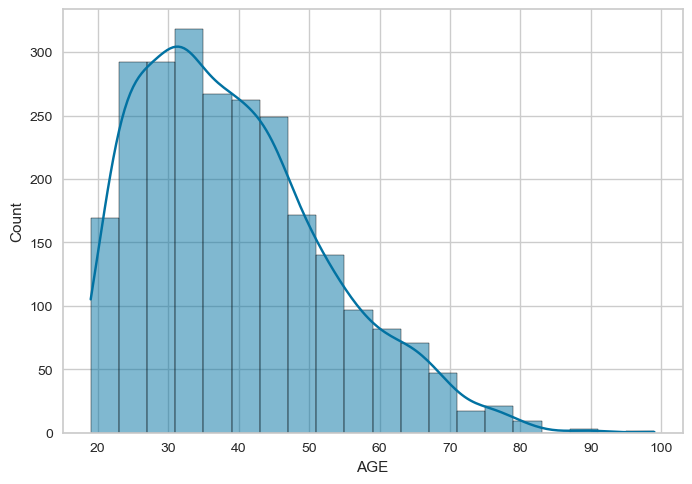

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: AGE distribution
sns.histplot(customer_df['AGE'], bins=20, kde=True)
plt.show()



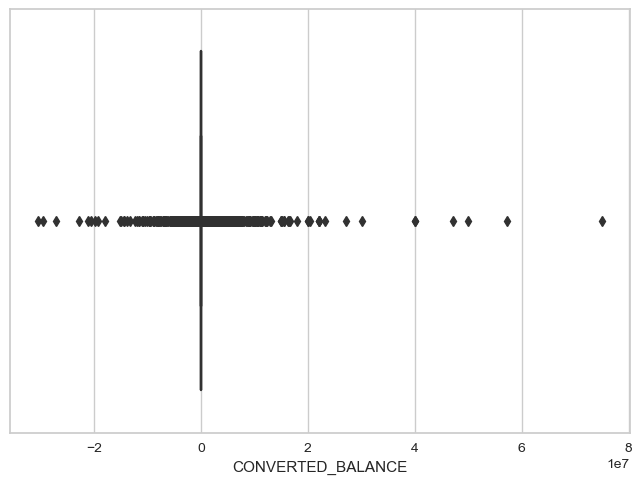

In [34]:
# Account balances
sns.boxplot(x=account_df['CONVERTED_BALANCE'])
plt.show()

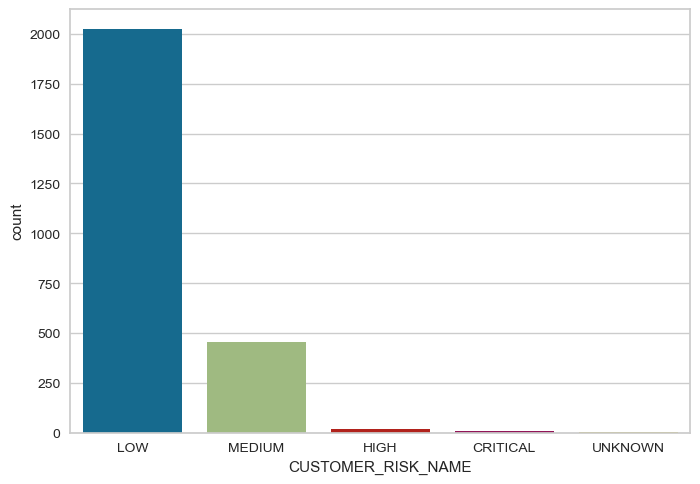

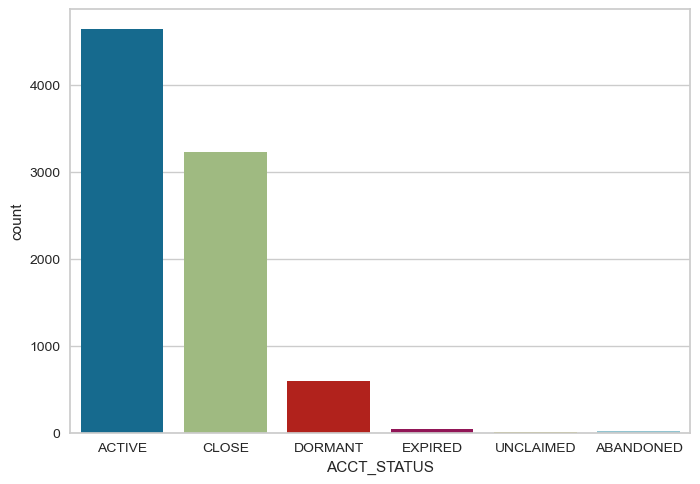

In [35]:
# Count of customers by risk
sns.countplot(x='CUSTOMER_RISK_NAME', data=customer_df)
plt.show()

# Account status
sns.countplot(x='ACCT_STATUS', data=account_df)
plt.show()

In [36]:
account_df

,MASKED_ID,ACC_MASKED_ID,TERM,TERM_AMOUNT,OOD,ACTIVE_PRODUCT,ORIG_CONTRACT_DATE,ACCT_CLOSE_DATE,ACCT_STATUS,MONTHEND_CONVERTED_BALANCE,CONVERTED_BALANCE,JUN_25,JUL_25,AUG_25,SEP_25,OCT_25,NOV_25
0,000454,BB00106DV0L7,0,0.0,0.0,SAVINGS ACCOUNT,2022-11-24,NaT,ACTIVE,4.207961e+05,1.761807e+04,5.816745e+04,7.188120e+04,1.290630e+03,1.952680e+03,1.506377e+04,2.226882e+05
1,000454,BB00106F1DX0,60M,500000.0,0.0,FIXED DEPOSIT ACCOUNT,2022-11-24,NaT,ACTIVE,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05
2,000454,BB00106L3ZVN,1097D,400000.0,0.0,LOAN ACCOUNT,2022-11-24,2025-12-03,CLOSE,0.000000e+00,0.000000e+00,-6.444448e+04,-5.304663e+04,-4.322869e+04,-3.287300e+04,-2.233317e+04,-1.130280e+04
3,000454,BB00133NSWRT,369D,2375000.0,0.0,LOAN ACCOUNT,2022-12-21,2023-11-10,CLOSE,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,000454,BB00138PNPFT,60M,2500000.0,0.0,FIXED DEPOSIT ACCOUNT,2022-12-16,NaT,ACTIVE,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9998721,BB09079RPQ53,0,0.0,0.0,SAVINGS ACCOUNT,2014-06-30,NaT,ACTIVE,3.654700e+02,9.254700e+02,2.586855e+04,2.701799e+04,3.078505e+04,4.528308e+04,2.068335e+04,8.629330e+03
8516,9999535,BB02118R8W32,0,0.0,0.0,SAVINGS ACCOUNT,2024-11-25,NaT,ACTIVE,8.833616e+04,8.211600e+02,1.016601e+05,1.156048e+06,5.234788e+04,6.728861e+04,1.164431e+05,1.327792e+05
8517,9999535,BB09079FWV46,0,0.0,0.0,SAVINGS ACCOUNT,2014-07-18,NaT,ACTIVE,7.789401e+05,2.758661e+05,1.404001e+04,6.464130e+03,1.243665e+05,7.613335e+04,2.626008e+05,8.083205e+05
8518,9999658,BB09079VJS24,0,0.0,0.0,SAVINGS ACCOUNT,2014-04-30,NaT,ACTIVE,5.454049e+04,4.559549e+04,5.743928e+04,6.547739e+04,7.128710e+04,7.698738e+04,7.129555e+04,4.570675e+04


In [37]:
customer_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,MARITAL_STATUS,DATE_OF_BIRTH,EMPLOYMENT_STATUS,MASKED_LEGAL_ID,LEGAL_DOC_NAME,INDUSTRY_CODE,INDUSTRY
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,MARRIED,1989-02-12,UNEMPLOYED,673211788H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,SINGLE,1998-04-19,EMPLOYED,764988120H,NIC,9848688888,"TRADE-GARMENTS, CULTURAL AND RECREATION GOODS"
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,Unknown,1984-03-22,EMPLOYED,623608269H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,Unknown,2000-03-23,EMPLOYED,088836189142,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,MARRIED,1964-09-07,UNEMPLOYED,425399959W,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,SINGLE,1986-06-08,EMPLOYED,644488129H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...
2505,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,SINGLE,1991-04-21,BUSINESS,799900186H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...
2506,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,MARRIED,1980-06-22,SELF-EMPLOYED,976895289567,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...
2507,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,MARRIED,1996-04-30,SELF-EMPLOYED,744098515H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...


# Rule 1 - Hard Eligibility & Regulatory Rules

## Regulatory Age Check

In [38]:
customer_df['Eligibility_Flag'] = 'ELIGIBLE'
customer_df['Rejection_Reason'] = None

In [39]:
customer_df.loc[
    (customer_df['AGE'] < 18) | (customer_df['AGE'] > 80),
    ['Eligibility_Flag', 'Rejection_Reason']
] = ['REJECT', 'Regulatory Age Restriction']


In [40]:
customer_df[customer_df['Eligibility_Flag'] == 'REJECT'][['AGE', 'Eligibility_Flag', 'Rejection_Reason']]


,AGE,Eligibility_Flag,Rejection_Reason
1342,88,REJECT,Regulatory Age Restriction
1394,90,REJECT,Regulatory Age Restriction
1912,90,REJECT,Regulatory Age Restriction
2015,99,REJECT,Regulatory Age Restriction
2124,81,REJECT,Regulatory Age Restriction
2160,82,REJECT,Regulatory Age Restriction
2369,82,REJECT,Regulatory Age Restriction


In [41]:
customer_df['Eligibility_Flag'].value_counts()


ELIGIBLE    2502
REJECT         7
Name: Eligibility_Flag, dtype: int64

In [42]:
eligible_cus_df = customer_df[customer_df['Eligibility_Flag'] == 'ELIGIBLE'].copy()


## Account Eligibility Check

In [43]:
active_accounts = account_df[
    (account_df['ACCT_STATUS'] == 'ACTIVE') |
    (account_df['ACCT_CLOSE_DATE'].isna())
]

active_account_count = (
    active_accounts
    .groupby('MASKED_ID')
    .size()
    .reset_index(name='Number_of_Active_Accounts')
)

In [44]:
eligible_cus_df = eligible_cus_df.merge(
    active_account_count,
    on='MASKED_ID',
    how='left'
)

In [45]:

# if no accounts isnted of Nan use 0 
eligible_cus_df['Number_of_Active_Accounts'] = (
    eligible_cus_df['Number_of_Active_Accounts']
    .fillna(0)
    .astype(int)
)


In [46]:
# Step 1: Set ELSE condition (default)
eligible_cus_df['Eligibility_Flag'] = 'ELIGIBLE'
eligible_cus_df['Rejection_Reason'] = 'Existing Customer'

# Step 2: Apply IF condition
eligible_cus_df.loc[
    eligible_cus_df['Number_of_Active_Accounts'] == 0,
    ['Eligibility_Flag', 'Rejection_Reason']
] = ['REJECT', 'Non-Existing Customer']

In [47]:
eligible_cus_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,MARITAL_STATUS,DATE_OF_BIRTH,EMPLOYMENT_STATUS,MASKED_LEGAL_ID,LEGAL_DOC_NAME,INDUSTRY_CODE,INDUSTRY,Eligibility_Flag,Rejection_Reason,Number_of_Active_Accounts
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,MARRIED,1989-02-12,UNEMPLOYED,673211788H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,5
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,SINGLE,1998-04-19,EMPLOYED,764988120H,NIC,9848688888,"TRADE-GARMENTS, CULTURAL AND RECREATION GOODS",ELIGIBLE,Existing Customer,2
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,Unknown,1984-03-22,EMPLOYED,623608269H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,1
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,Unknown,2000-03-23,EMPLOYED,088836189142,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,MARRIED,1964-09-07,UNEMPLOYED,425399959W,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,SINGLE,1986-06-08,EMPLOYED,644488129H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,SINGLE,1991-04-21,BUSINESS,799900186H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,MARRIED,1980-06-22,SELF-EMPLOYED,976895289567,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,2
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,MARRIED,1996-04-30,SELF-EMPLOYED,744098515H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1


In [48]:
eligible_cus_df['Number_of_Active_Accounts'].describe()

count    2502.000000
mean        2.107514
std         2.602868
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        46.000000
Name: Number_of_Active_Accounts, dtype: float64

In [49]:
eligible_cus_df['Number_of_Active_Accounts'].value_counts().sort_index()

0        9
1     1524
2      462
3      195
4       94
5       54
6       47
7       18
8       29
9        9
10      12
11      10
12      12
13       7
14       1
15       5
16       4
17       1
19       3
20       1
25       1
27       1
28       1
35       1
46       1
Name: Number_of_Active_Accounts, dtype: int64

In [50]:
eligible_cus_df['Eligibility_Flag'].unique()

array(['ELIGIBLE', 'REJECT'], dtype=object)

## Employment Status Validation

In [51]:
valid_employment_status = pd.read_sql(
    "SELECT DISTINCT EMPLOYMENT_STATUS FROM CUSTOMER_DETAILS",
    conn
)['EMPLOYMENT_STATUS'].dropna().tolist()

In [52]:
eligible_cus_df['Employment_Status_Flag'] = 'Valid Employment Status'

eligible_cus_df.loc[
    ~eligible_cus_df['EMPLOYMENT_STATUS'].isin(valid_employment_status),
    'Employment_Status_Flag'
] = 'Invalid Employment Status'

In [53]:
eligible_cus_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,DATE_OF_BIRTH,EMPLOYMENT_STATUS,MASKED_LEGAL_ID,LEGAL_DOC_NAME,INDUSTRY_CODE,INDUSTRY,Eligibility_Flag,Rejection_Reason,Number_of_Active_Accounts,Employment_Status_Flag
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,1989-02-12,UNEMPLOYED,673211788H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,5,Valid Employment Status
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,1998-04-19,EMPLOYED,764988120H,NIC,9848688888,"TRADE-GARMENTS, CULTURAL AND RECREATION GOODS",ELIGIBLE,Existing Customer,2,Valid Employment Status
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,1984-03-22,EMPLOYED,623608269H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,1,Valid Employment Status
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,2000-03-23,EMPLOYED,088836189142,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3,Valid Employment Status
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,1964-09-07,UNEMPLOYED,425399959W,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,1986-06-08,EMPLOYED,644488129H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,1991-04-21,BUSINESS,799900186H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3,Valid Employment Status
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,1980-06-22,SELF-EMPLOYED,976895289567,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,2,Valid Employment Status
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,1996-04-30,SELF-EMPLOYED,744098515H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status


In [54]:
# Check age range
print(eligible_cus_df['AGE'].min(), eligible_cus_df['AGE'].max())

# Check active accounts
print(eligible_cus_df['Number_of_Active_Accounts'].min())

# Check employment status
print(eligible_cus_df['EMPLOYMENT_STATUS'].unique())

# Check eligibility flag
print(eligible_cus_df['Eligibility_Flag'].unique())

19 80
0
['UNEMPLOYED' 'EMPLOYED' 'SELF-EMPLOYED' 'BUSINESS' 'STUDENT' 'RETIRED'
 'FREELANCE' 'Unknown']
['ELIGIBLE' 'REJECT']


# Rule 2 - Employment-Based Routing & Participation Rules

## Routing & Participation 

In [55]:
eligible_cus_df['Employment_Segment'] = 'Other'

In [56]:
eligible_cus_df.loc[
    (eligible_cus_df['EMPLOYMENT_STATUS'].isin(['EMPLOYED', 'SELF-EMPLOYED', 'BUSINESS'])) &
    (eligible_cus_df['AGE'].between(18, 60)),
    'Employment_Segment'
] = 'Core Working Group'


In [57]:
eligible_cus_df.loc[
    (eligible_cus_df['EMPLOYMENT_STATUS'].isin(['UNEMPLOYED	', 'RETIRED', 'STUDENT', 'FREELANCE'])) &
    (eligible_cus_df['AGE'].between(18, 65)),
    'Employment_Segment'
] = 'Special Segment'

In [58]:
eligible_cus_df.loc[
    (eligible_cus_df['EMPLOYMENT_STATUS'].isin([
        'UNEMPLOYED', 'RETIRED', 'STUDENT', 'FREELANCE', 
        'EMPLOYED', 'SELF-EMPLOYED', 'BUSINESS'
    ])) &
    (~eligible_cus_df['AGE'].between(18, 60)),  # not between 18 and 60
    'Employment_Segment'
] = 'Not valid segment'

# Rule 3 - Age-Based Segments

In [59]:
eligible_cus_df['Age_Bucket'] = pd.cut(
    eligible_cus_df['AGE'],
    bins=[17, 25, 40, 60, 80],
    labels=['Young Adult', 'Adult', 'Middle-Aged', 'Senior']
)

In [60]:
eligible_cus_df['Age_Bucket'].value_counts(dropna=False)

Adult          1085
Middle-Aged     822
Young Adult     395
Senior          200
Name: Age_Bucket, dtype: int64

# Rule 4 - Financial capacity

In [61]:
balance_cols = ['JUN_25', 'JUL_25', 'AUG_25', 'SEP_25', 'OCT_25', 'NOV_25']

In [62]:
account_df['Monthly_Avg_Balance'] = account_df[balance_cols].mean(axis=1)

In [63]:
account_df

,MASKED_ID,ACC_MASKED_ID,TERM,TERM_AMOUNT,OOD,ACTIVE_PRODUCT,ORIG_CONTRACT_DATE,ACCT_CLOSE_DATE,ACCT_STATUS,MONTHEND_CONVERTED_BALANCE,CONVERTED_BALANCE,JUN_25,JUL_25,AUG_25,SEP_25,OCT_25,NOV_25,Monthly_Avg_Balance
0,000454,BB00106DV0L7,0,0.0,0.0,SAVINGS ACCOUNT,2022-11-24,NaT,ACTIVE,4.207961e+05,1.761807e+04,5.816745e+04,7.188120e+04,1.290630e+03,1.952680e+03,1.506377e+04,2.226882e+05,6.184066e+04
1,000454,BB00106F1DX0,60M,500000.0,0.0,FIXED DEPOSIT ACCOUNT,2022-11-24,NaT,ACTIVE,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05
2,000454,BB00106L3ZVN,1097D,400000.0,0.0,LOAN ACCOUNT,2022-11-24,2025-12-03,CLOSE,0.000000e+00,0.000000e+00,-6.444448e+04,-5.304663e+04,-4.322869e+04,-3.287300e+04,-2.233317e+04,-1.130280e+04,-3.787146e+04
3,000454,BB00133NSWRT,369D,2375000.0,0.0,LOAN ACCOUNT,2022-12-21,2023-11-10,CLOSE,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,000454,BB00138PNPFT,60M,2500000.0,0.0,FIXED DEPOSIT ACCOUNT,2022-12-16,NaT,ACTIVE,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9998721,BB09079RPQ53,0,0.0,0.0,SAVINGS ACCOUNT,2014-06-30,NaT,ACTIVE,3.654700e+02,9.254700e+02,2.586855e+04,2.701799e+04,3.078505e+04,4.528308e+04,2.068335e+04,8.629330e+03,2.637789e+04
8516,9999535,BB02118R8W32,0,0.0,0.0,SAVINGS ACCOUNT,2024-11-25,NaT,ACTIVE,8.833616e+04,8.211600e+02,1.016601e+05,1.156048e+06,5.234788e+04,6.728861e+04,1.164431e+05,1.327792e+05,2.710945e+05
8517,9999535,BB09079FWV46,0,0.0,0.0,SAVINGS ACCOUNT,2014-07-18,NaT,ACTIVE,7.789401e+05,2.758661e+05,1.404001e+04,6.464130e+03,1.243665e+05,7.613335e+04,2.626008e+05,8.083205e+05,2.153209e+05
8518,9999658,BB09079VJS24,0,0.0,0.0,SAVINGS ACCOUNT,2014-04-30,NaT,ACTIVE,5.454049e+04,4.559549e+04,5.743928e+04,6.547739e+04,7.128710e+04,7.698738e+04,7.129555e+04,4.570675e+04,6.469891e+04


In [64]:
customer_balance_df = (
    account_df
    .groupby('MASKED_ID', as_index=False)['Monthly_Avg_Balance']
    .mean()
)


In [65]:
eligible_cus_df = eligible_cus_df.merge(
    customer_balance_df,
    on='MASKED_ID',
    how='left'
)


In [66]:
eligible_cus_df['Financial_Capacity'] = 'Unknown / Missing Balance Data'

eligible_cus_df.loc[
    eligible_cus_df['Monthly_Avg_Balance'] >= 100000,
    'Financial_Capacity'
] = 'High Financial Capacity'

eligible_cus_df.loc[
    eligible_cus_df['Monthly_Avg_Balance'].between(50000, 99999),
    'Financial_Capacity'
] = 'Medium Financial Capacity'

eligible_cus_df.loc[
    eligible_cus_df['Monthly_Avg_Balance'] < 50000,
    'Financial_Capacity'
] = 'Low Financial Capacity'


In [67]:
eligible_cus_df[['Monthly_Avg_Balance', 'Financial_Capacity']].sample(10)

,Monthly_Avg_Balance,Financial_Capacity
1401,-3.610955e+06,Low Financial Capacity
999,-7.459669e+05,Low Financial Capacity
1679,1.939581e+05,High Financial Capacity
742,1.665604e+04,Low Financial Capacity
1943,5.041310e+03,Low Financial Capacity
448,6.203512e+03,Low Financial Capacity
498,-7.145212e+05,Low Financial Capacity
355,2.070567e+02,Low Financial Capacity
361,7.845938e+03,Low Financial Capacity
1202,4.854285e+03,Low Financial Capacity


# Rule 6 - Salary Verification Check

In [68]:
transaction_df

,MASK_TRAN_REF,ACC_MASKED_ID,MASKED_ID,AMOUNT_LCY,TRANSACTION_CODE,TRAN_NARRATIVE,BOOKING_DATE
0,9.825868e+13,BB02901VMKYW,014678,118500.0,774,CRM Cash Deposit,2025-08-15
1,9.814575e+13,BB02901VMKYW,014678,75000.0,774,CRM Cash Deposit,2025-08-04
2,9.832860e+13,BB02901VMKYW,014678,3000.0,774,CRM Cash Deposit,2025-08-22
3,9.815965e+13,BB02901VMKYW,014678,78000.0,774,CRM Cash Deposit,2025-08-05
4,9.823331e+13,BB02901VMKYW,014678,110000.0,774,CRM Cash Deposit,2025-08-13
...,...,...,...,...,...,...,...
363331,9.847196e+13,BB09079UEI07,9145405,-50.0,9004,POS Transaction,2025-09-06
363332,9.852475e+13,BB09079UEI07,9145405,-25000.0,8005,Outward CEFT Transfer,2025-09-11
363333,9.844866e+13,BB09079UEI07,9145405,-5.0,797,ATM Withdrawal Fee,2025-09-03
363334,9.844182e+13,BB09079UEI07,9145405,-5.0,797,ATM Withdrawal Fee,2025-09-03


In [69]:
transaction_df['AMOUNT_LCY'].dtype

dtype('float64')

In [70]:
transaction_df['AMOUNT_LCY'] = pd.to_numeric(
    transaction_df['AMOUNT_LCY'],
    errors='coerce'
)

In [71]:
transaction_df['AMOUNT_LCY'].dtype

dtype('float64')

In [72]:
credit_df = transaction_df[
    transaction_df['AMOUNT_LCY'] > 0
].copy()


In [73]:
credit_df[['AMOUNT_LCY']].head()

,AMOUNT_LCY
0,118500.0
1,75000.0
2,3000.0
3,78000.0
4,110000.0


In [74]:
credit_df['Month'] = pd.to_datetime(
    credit_df['BOOKING_DATE']
).dt.to_period('M')

In [75]:
credit_df

,MASK_TRAN_REF,ACC_MASKED_ID,MASKED_ID,AMOUNT_LCY,TRANSACTION_CODE,TRAN_NARRATIVE,BOOKING_DATE,Month
0,9.825868e+13,BB02901VMKYW,014678,118500.000000,774,CRM Cash Deposit,2025-08-15,2025-08
1,9.814575e+13,BB02901VMKYW,014678,75000.000000,774,CRM Cash Deposit,2025-08-04,2025-08
2,9.832860e+13,BB02901VMKYW,014678,3000.000000,774,CRM Cash Deposit,2025-08-22,2025-08
3,9.815965e+13,BB02901VMKYW,014678,78000.000000,774,CRM Cash Deposit,2025-08-05,2025-08
4,9.823331e+13,BB02901VMKYW,014678,110000.000000,774,CRM Cash Deposit,2025-08-13,2025-08
...,...,...,...,...,...,...,...,...
363302,9.867462e+13,BB09079JLP28,9852304,175000.000000,52,Cash Deposit,2025-09-26,2025-09
363316,9.845197e+13,BB09079ISP79,9124075,16648.000000,1002,Transfer Credit-MobileBanking,2025-09-04,2025-09
363317,9.856685e+13,BB09079ISP79,9124075,10000.000000,1002,Transfer Credit-MobileBanking,2025-09-15,2025-09
363319,9.851717e+13,BB01067MGFJ4,196013,36037.929688,258,Credit Transfer,2025-09-10,2025-09


In [76]:
monthly_credit = (
    credit_df
    .groupby(['MASKED_ID', 'Month'], as_index=False)['AMOUNT_LCY']
    .sum()
)

In [77]:
monthly_credit

,MASKED_ID,Month,AMOUNT_LCY
0,000454,2025-05,1.643678e+06
1,000454,2025-06,1.584125e+04
2,000454,2025-07,1.234416e+06
3,000454,2025-08,1.000131e+04
4,000454,2025-09,1.223049e+06
...,...,...,...
8091,9999658,2025-07,3.200000e+04
8092,9999658,2025-08,1.500000e+04
8093,9999658,2025-09,2.500000e+04
8094,9999658,2025-11,5.650000e+04


In [78]:
avg_monthly_income = (
    monthly_credit
    .groupby('MASKED_ID', as_index=False)['AMOUNT_LCY']
    .mean()
    .rename(columns={'AMOUNT_LCY': 'Avg_Monthly_Credit'})
)

In [79]:
eligible_cus_df['MASKED_ID'] = eligible_cus_df['MASKED_ID'].astype(str)


In [80]:
avg_monthly_income['MASKED_ID'] = avg_monthly_income['MASKED_ID'].astype(str)

In [81]:
eligible_cus_df['MASKED_ID'].dtype

dtype('O')

In [82]:
avg_monthly_income['MASKED_ID'].dtype

dtype('O')

In [83]:
eligible_cus_df = eligible_cus_df.merge(
    avg_monthly_income,
    on='MASKED_ID',
    how='left'
)


In [84]:
mask = (
    eligible_cus_df['Avg_Monthly_Credit'].isna() &
    (eligible_cus_df['Monthly_Avg_Balance'] > 0)
)

eligible_cus_df.loc[mask, 'Avg_Monthly_Credit'] = (
    eligible_cus_df.loc[mask, 'Monthly_Avg_Balance']
)

In [85]:
eligible_cus_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,INDUSTRY,Eligibility_Flag,Rejection_Reason,Number_of_Active_Accounts,Employment_Status_Flag,Employment_Segment,Age_Bucket,Monthly_Avg_Balance,Financial_Capacity,Avg_Monthly_Credit
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,5,Valid Employment Status,Other,Adult,240032.314495,High Financial Capacity,594627.180067
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,"TRADE-GARMENTS, CULTURAL AND RECREATION GOODS",ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Adult,1288.532501,Low Financial Capacity,1288.532501
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Middle-Aged,0.000000,Low Financial Capacity,NaN
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Young Adult,-42844.881154,Low Financial Capacity,406128.730574
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Not valid segment,Senior,1377.552490,Low Financial Capacity,1377.552490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,5273.733337,Low Financial Capacity,84100.000000
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Adult,26121.969971,Low Financial Capacity,418690.281250
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Middle-Aged,243207.672119,High Financial Capacity,626505.000000
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,64698.908854,Medium Financial Capacity,32400.000000


In [86]:

eligible_cus_df['Cluster_Name'] = 'Unknown / Missing Salary'

eligible_cus_df.loc[
    eligible_cus_df['Avg_Monthly_Credit'] >= 100000,
    'Cluster_Name'
] = 'High Salary'

eligible_cus_df.loc[
    eligible_cus_df['Avg_Monthly_Credit'].between(50000, 99999),
    'Cluster_Name'
] = 'Medium Salary'

eligible_cus_df.loc[
    eligible_cus_df['Avg_Monthly_Credit'] < 50000,
    'Cluster_Name'
] = 'Low Salary'


In [87]:
eligible_cus_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,Eligibility_Flag,Rejection_Reason,Number_of_Active_Accounts,Employment_Status_Flag,Employment_Segment,Age_Bucket,Monthly_Avg_Balance,Financial_Capacity,Avg_Monthly_Credit,Cluster_Name
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,ELIGIBLE,Existing Customer,5,Valid Employment Status,Other,Adult,240032.314495,High Financial Capacity,594627.180067,High Salary
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Adult,1288.532501,Low Financial Capacity,1288.532501,Low Salary
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Middle-Aged,0.000000,Low Financial Capacity,NaN,Unknown / Missing Salary
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Young Adult,-42844.881154,Low Financial Capacity,406128.730574,High Salary
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Not valid segment,Senior,1377.552490,Low Financial Capacity,1377.552490,Low Salary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,5273.733337,Low Financial Capacity,84100.000000,Medium Salary
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Adult,26121.969971,Low Financial Capacity,418690.281250,High Salary
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Middle-Aged,243207.672119,High Financial Capacity,626505.000000,High Salary
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,64698.908854,Medium Financial Capacity,32400.000000,Low Salary


In [88]:
import pandas as pd

# Export to Excel
# pip install openpyxl
eligible_cus_df.to_excel("eligible_customers.xlsx", index=False, sheet_name="Eligible_Customers")

print("Data successfully exported to Excel!")


Data successfully exported to Excel!


Creating Credit scores

In [89]:

# # Ensure AMOUNT_LCY is numeric

# transaction_df["AMOUNT_LCY"] = pd.to_numeric(transaction_df["AMOUNT_LCY"], errors='coerce').fillna(0)


# Create inflow, outflow, net, and absolute activity

transaction_df["INFLOW"] = transaction_df["AMOUNT_LCY"].apply(lambda x: x if x > 0 else 0)
transaction_df["OUTFLOW"] = transaction_df["AMOUNT_LCY"].apply(lambda x: abs(x) if x < 0 else 0)
transaction_df["NET_AMOUNT"] = transaction_df["AMOUNT_LCY"]  # keeps signs
transaction_df["ABS_ACTIVITY"] = transaction_df["AMOUNT_LCY"].abs()


#  Aggregate per customer

txn_features = transaction_df.groupby("MASKED_ID").agg({
    "INFLOW": "sum",
    "OUTFLOW": "sum",
    "NET_AMOUNT": "sum",
    "ABS_ACTIVITY": "sum",
    "AMOUNT_LCY": ["mean", "std", "count"]  # original avg/std/count
}).reset_index()


# Flatten MultiIndex columns from aggregation

txn_features.columns = [
    "MASKED_ID",
    "TOTAL_INFLOW",
    "TOTAL_OUTFLOW",
    "NET_TRANSACTION_SUM",
    "ABS_ACTIVITY",
    "AVG_TRANSACTION",
    "STD_TRANSACTION",
    "TXN_COUNT"
]

txn_features["INFLOW_RATIO"] = txn_features["TOTAL_INFLOW"] / (txn_features["ABS_ACTIVITY"] + 1)
txn_features["OUTFLOW_RATIO"] = txn_features["TOTAL_OUTFLOW"] / (txn_features["ABS_ACTIVITY"] + 1)
txn_features["NET_RATIO"] = txn_features["NET_TRANSACTION_SUM"] / (txn_features["ABS_ACTIVITY"] + 1)


# Average transaction per day (assuming 30 days)
txn_features["AVG_TXN_PER_DAY"] = txn_features["TXN_COUNT"] / 30

# Transaction volatility: std relative to average
txn_features["TRANSACTION_VOLATILITY"] = txn_features["STD_TRANSACTION"] / (txn_features["AVG_TRANSACTION"] + 1)



In [90]:

# Fill missing values with 0

num_cols = txn_features.select_dtypes(include=["float64", "int64"]).columns
txn_features[num_cols] = txn_features[num_cols].fillna(0)

# Check result

print(txn_features.head())

  MASKED_ID  TOTAL_INFLOW  TOTAL_OUTFLOW  NET_TRANSACTION_SUM  ABS_ACTIVITY  \
0    000454  4.162390e+06   5.696551e+06        -1.534160e+06  9.858941e+06   
1    001538  3.249030e+06   6.594798e+06        -3.345768e+06  9.843828e+06   
2    001993  1.104928e+06   1.247065e+06        -1.421364e+05  2.351993e+06   
3    003399  1.115000e+06   2.343421e+06        -1.228421e+06  3.458421e+06   
4    003996  1.238358e+05   2.600734e+05        -1.362376e+05  3.839092e+05   

   AVG_TRANSACTION  STD_TRANSACTION  TXN_COUNT  INFLOW_RATIO  OUTFLOW_RATIO  \
0    -12372.260785    247530.602318        124      0.422194       0.577805   
1     -9116.534110    104930.224168        367      0.330058       0.669942   
2      -728.904578     25902.062239        195      0.469784       0.530216   
3     -6862.689169     38158.564729        179      0.322401       0.677598   
4      -765.379550      3540.331580        178      0.322565       0.677433   

   NET_RATIO  AVG_TXN_PER_DAY  TRANSACTION_VOLATIL

In [91]:
# Ensure numeric columns
loan_cashflow_df["CAPITAL_TO_BE_PAIED"] = pd.to_numeric(
    loan_cashflow_df["CAPITAL_TO_BE_PAIED"].astype(str).str.replace(",", "").str.replace(" ", ""),
    errors='coerce'
).fillna(0)

loan_cashflow_df["INTEREST_TO_BE_PAIED"] = pd.to_numeric(
    loan_cashflow_df["INTEREST_TO_BE_PAIED"].astype(str).str.replace(",", "").str.replace(" ", ""),
    errors='coerce'
).fillna(0)

loan_cashflow_df["TERM_AMOUNT"] = pd.to_numeric(
    loan_cashflow_df["TERM_AMOUNT"].astype(str).str.replace(",", "").str.replace(" ", ""),
    errors='coerce'
).fillna(0)

# Payment ratio per installment
loan_cashflow_df["PAYMENT_RATIO"] = loan_cashflow_df["CAPITAL_TO_BE_PAIED"] / loan_cashflow_df["TERM_AMOUNT"]

# Aggregate per customer
cash_features = loan_cashflow_df.groupby("MASKED_ID").agg({
    "CAPITAL_TO_BE_PAIED": "sum",
    "INTEREST_TO_BE_PAIED": "sum",
    "PAYMENT_RATIO": "mean"
}).reset_index()

# Rename columns
cash_features.columns = [
    "MASKED_ID",
    "TOTAL_CAPITAL_DUE",
    "TOTAL_INTEREST_DUE",
    "AVG_PAYMENT_RATIO"
]

# Fill missing values
cash_features = cash_features.fillna(0)


In [92]:
# Aggregate per customer
cash_features = loan_cashflow_df.groupby("MASKED_ID").agg({
    "CAPITAL_TO_BE_PAIED": "sum",
    "INTEREST_TO_BE_PAIED": "sum",
    "PAYMENT_RATIO": "mean"
}).reset_index()

# Rename columns
cash_features.columns = [
    "MASKED_ID",
    "TOTAL_CAPITAL_DUE",
    "TOTAL_INTEREST_DUE",
    "AVG_PAYMENT_RATIO"
]

# Fill NaN for customers with no loans
cash_features.fillna(0, inplace=True)


In [93]:
# Ensure numeric columns
account_df["MONTHEND_CONVERTED_BALANCE"] = pd.to_numeric(account_df["MONTHEND_CONVERTED_BALANCE"], errors='coerce').fillna(0)
account_df["CONVERTED_BALANCE"] = pd.to_numeric(account_df["CONVERTED_BALANCE"], errors='coerce').fillna(0)
account_df["OOD"] = pd.to_numeric(account_df["OOD"], errors='coerce').fillna(0)

# Calculate Utilization: ratio of loan balance / term amount
# (if TERM_AMOUNT available, else skip or adjust)
account_df["UTILIZATION"] = account_df["CONVERTED_BALANCE"] / account_df["TERM_AMOUNT"].replace(0, 1)

# Aggregate per customer if multiple accounts
acc_features = account_df.groupby("MASKED_ID").agg({
    "MONTHEND_CONVERTED_BALANCE": "mean",
    "UTILIZATION": "mean",
    "OOD": "max"
}).reset_index()

# Fill missing numeric values
acc_features = acc_features.fillna(0)


In [94]:
model_data = eligible_cus_df.copy()

In [95]:
eligible_cus_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,Eligibility_Flag,Rejection_Reason,Number_of_Active_Accounts,Employment_Status_Flag,Employment_Segment,Age_Bucket,Monthly_Avg_Balance,Financial_Capacity,Avg_Monthly_Credit,Cluster_Name
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,ELIGIBLE,Existing Customer,5,Valid Employment Status,Other,Adult,240032.314495,High Financial Capacity,594627.180067,High Salary
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Adult,1288.532501,Low Financial Capacity,1288.532501,Low Salary
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Middle-Aged,0.000000,Low Financial Capacity,NaN,Unknown / Missing Salary
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Young Adult,-42844.881154,Low Financial Capacity,406128.730574,High Salary
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Not valid segment,Senior,1377.552490,Low Financial Capacity,1377.552490,Low Salary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,5273.733337,Low Financial Capacity,84100.000000,Medium Salary
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Adult,26121.969971,Low Financial Capacity,418690.281250,High Salary
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Middle-Aged,243207.672119,High Financial Capacity,626505.000000,High Salary
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,64698.908854,Medium Financial Capacity,32400.000000,Low Salary


In [96]:
model_data = model_data.merge(txn_features, on="MASKED_ID", how="left")

In [97]:
model_data = model_data.merge(cash_features, on="MASKED_ID", how="left")

In [98]:
model_data = model_data.merge(acc_features, on="MASKED_ID", how="left")

In [99]:
num_cols = model_data.select_dtypes(include=["float64", "int64"]).columns
model_data[num_cols] = model_data[num_cols].fillna(0)

In [100]:
# Identify categorical columns
cat_cols = model_data.select_dtypes(include=["category", "object"]).columns

for col in cat_cols:
    if pd.api.types.is_categorical_dtype(model_data[col]):
        # Add 'Unknown' to categories if not already present
        if "Unknown" not in model_data[col].cat.categories:
            model_data[col] = model_data[col].cat.add_categories("Unknown")
    # Fill missing values
    model_data[col] = model_data[col].fillna("Unknown")


In [101]:
print(model_data.head())
print(model_data.info())
print(model_data.isna().sum())

  MASKED_ID NAME_MASKED_ID  AGE  GENDER  CUSTOMER_RISK CUSTOMER_RISK_NAME  \
0    000454   CUSTOMER_356   36  FEMALE            1.0                LOW   
1    000866   CUSTOMER_410   27  FEMALE            1.0                LOW   
2    001135   CUSTOMER_455   41  FEMALE            1.0                LOW   
3    001538   CUSTOMER_899   25  FEMALE            1.0                LOW   
4    001906  CUSTOMER_2307   61  FEMALE            1.0                LOW   

                        OCCUPATION      DISTRICT  TARGET_CODE TARGET_DESC  \
0   Entrepreneur / Business Owners  ANURADHAPURA          948   Signature   
1  Garment & Related Trade Workers  ANURADHAPURA          908     Premier   
2    Private Sector Non-Executives    HAMBANTOTA          988   Essential   
3            Finance Professionals         GALLE          988   Essential   
4   Entrepreneur / Business Owners       COLOMBO          948   Signature   

   ... OUTFLOW_RATIO NET_RATIO AVG_TXN_PER_DAY TRANSACTION_VOLATILITY  \
0

In [102]:
# Creating the default flag

In [103]:
# Filter only credit accounts (LOAN ACCOUNT or BORROWINGS)
loan_accounts = account_df[account_df["ACTIVE_PRODUCT"].isin(["LOAN ACCOUNT", "BORROWINGS"])]



In [104]:


# Create customer-level default
customer_default = loan_accounts.groupby("MASKED_ID").apply(
    lambda x: 1 if (x["OOD"] > 30).any() or x["ACCT_STATUS"].isin(["UNCLAIMED","ABANDONED","EXPIRED"]).any() else 0
).reset_index(name="DEFAULT")

# Merge into model_data
model_data = model_data.drop(columns=["DEFAULT"], errors="ignore").merge(
    customer_default, on="MASKED_ID", how="left"
)

# Fill customers with no loan accounts with 0 (no default)
model_data["DEFAULT"] = model_data["DEFAULT"].fillna(0)

# Check distribution
print(model_data["DEFAULT"].value_counts())


0.0    2464
1.0      38
Name: DEFAULT, dtype: int64


In [105]:
model_data

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,NET_RATIO,AVG_TXN_PER_DAY,TRANSACTION_VOLATILITY,TOTAL_CAPITAL_DUE,TOTAL_INTEREST_DUE,AVG_PAYMENT_RATIO,MONTHEND_CONVERTED_BALANCE,UTILIZATION,OOD,DEFAULT
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,-0.155611,4.133333,-20.008519,1071845.16,135138.47,-0.007552,265556.892955,1631.711847,0.0,0.0
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,1253.765015,1228.765015,0.0,0.0
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.0
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,-0.339885,12.233333,-11.511144,-1354369.77,20821.79,0.000335,-173550.662476,2132.712500,0.0,0.0
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,1386.209961,1386.209961,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,-0.221896,2.033333,-12.990641,0.00,0.00,0.000000,1288.880005,38014.878906,0.0,0.0
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,-0.252041,13.766667,-7.688549,0.00,0.00,0.000000,43944.810313,26681.476969,0.0,0.0
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,-0.402970,8.566667,-12.892953,0.00,0.00,0.000000,433638.140625,138343.642487,0.0,0.0
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,-0.124652,2.766667,-14.293284,0.00,0.00,0.000000,54540.488281,45595.488281,0.0,0.0


In [106]:
#Select features for credit scoring
features = [
    "TOTAL_INFLOW","TOTAL_OUTFLOW","NET_TRANSACTION_SUM","ABS_ACTIVITY",
    "AVG_TRANSACTION","STD_TRANSACTION","TXN_COUNT",
    "TOTAL_CAPITAL_DUE","TOTAL_INTEREST_DUE","AVG_PAYMENT_RATIO",
    "UTILIZATION","MONTHEND_CONVERTED_BALANCE","OOD",
    "AGE"
]

In [107]:
X = model_data[features]
y = model_data["DEFAULT"]

In [108]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2497    0.0
2498    0.0
2499    0.0
2500    0.0
2501    0.0
Name: DEFAULT, Length: 2502, dtype: float64

In [109]:
#Train Logistic Regression & predict PD

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
model = LogisticRegression(class_weight="balanced")  # helps with imbalanced data
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [113]:
# model_data["RISK_SCORE"] = model.predict_proba(scaler.transform(X))[:,1]

In [114]:
# Predict PD and convert directly to credit score
min_score = 250  # Sri CRIB min
max_score = 900  # Sri CRIB max

model_data["CREDIT_SCORE"] = (
    (1 - model.predict_proba(scaler.transform(X))[:,1]) * (max_score - min_score) + min_score
).round(0)


In [115]:

# Show results
print(model_data[["MASKED_ID","DEFAULT","CREDIT_SCORE"]].head())

  MASKED_ID  DEFAULT  CREDIT_SCORE
0    000454      0.0         715.0
1    000866      0.0         774.0
2    001135      0.0         745.0
3    001538      0.0         718.0
4    001906      0.0         697.0


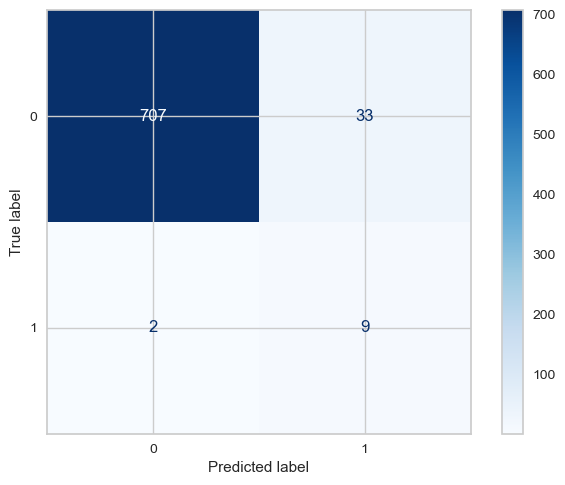

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap="Blues")


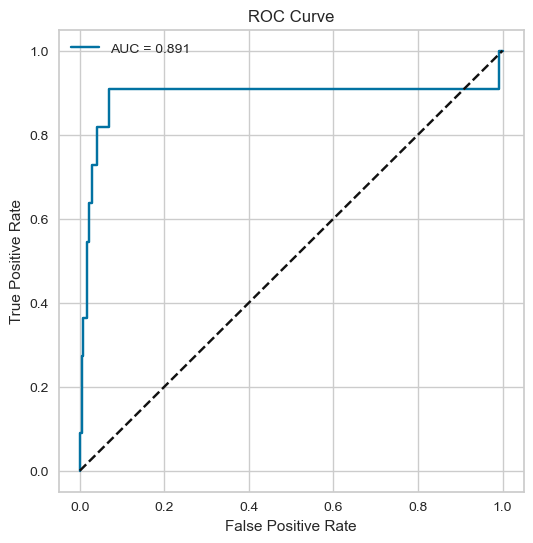

In [117]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


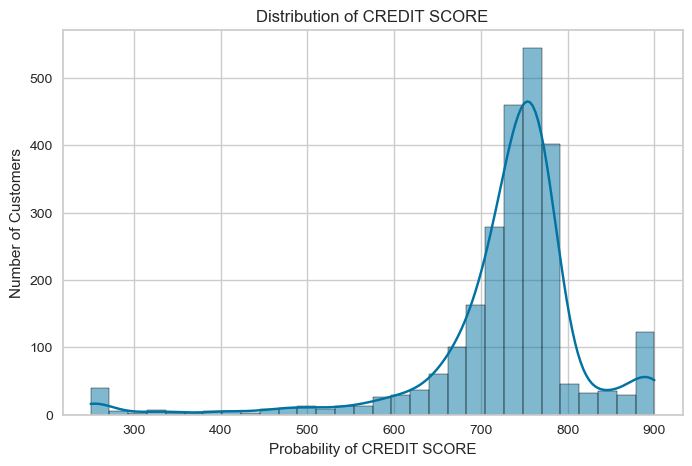

In [118]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(model_data["CREDIT_SCORE"], bins=30, kde=True)
plt.title("Distribution of CREDIT SCORE")
plt.xlabel("Probability of CREDIT SCORE")
plt.ylabel("Number of Customers")
plt.show()


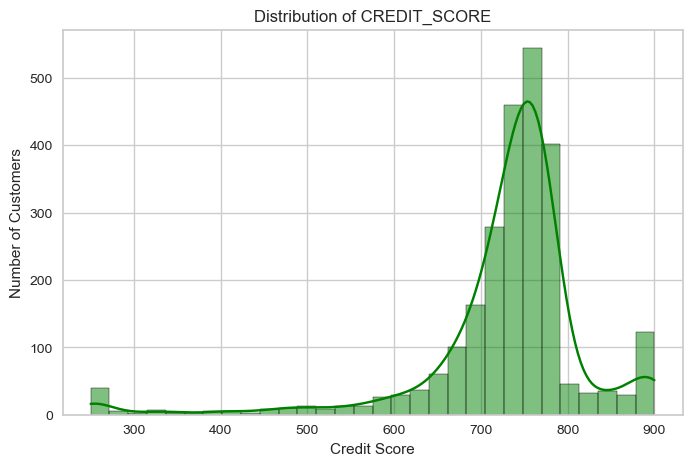

In [119]:
plt.figure(figsize=(8,5))
sns.histplot(model_data["CREDIT_SCORE"], bins=30, kde=True, color="green")
plt.title("Distribution of CREDIT_SCORE")
plt.xlabel("Credit Score")
plt.ylabel("Number of Customers")
plt.show()


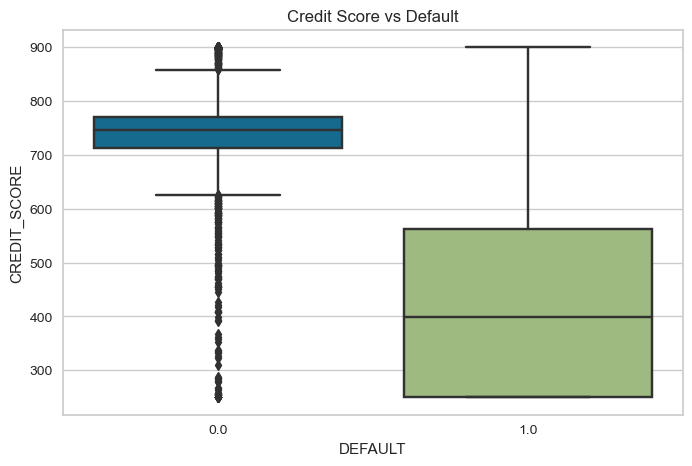

In [120]:
plt.figure(figsize=(8,5))
sns.boxplot(x="DEFAULT", y="CREDIT_SCORE", data=model_data)
plt.title("Credit Score vs Default")
plt.show()


In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.9533954727030626
Precision: 0.21428571428571427
Recall: 0.8181818181818182
F1 Score: 0.33962264150943394
ROC-AUC: 0.8907862407862408


In [122]:
model_data

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,AVG_TXN_PER_DAY,TRANSACTION_VOLATILITY,TOTAL_CAPITAL_DUE,TOTAL_INTEREST_DUE,AVG_PAYMENT_RATIO,MONTHEND_CONVERTED_BALANCE,UTILIZATION,OOD,DEFAULT,CREDIT_SCORE
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,4.133333,-20.008519,1071845.16,135138.47,-0.007552,265556.892955,1631.711847,0.0,0.0,715.0
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,0.000000,0.000000,0.00,0.00,0.000000,1253.765015,1228.765015,0.0,0.0,774.0
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.0,745.0
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,12.233333,-11.511144,-1354369.77,20821.79,0.000335,-173550.662476,2132.712500,0.0,0.0,718.0
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,0.000000,0.000000,0.00,0.00,0.000000,1386.209961,1386.209961,0.0,0.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,2.033333,-12.990641,0.00,0.00,0.000000,1288.880005,38014.878906,0.0,0.0,747.0
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,13.766667,-7.688549,0.00,0.00,0.000000,43944.810313,26681.476969,0.0,0.0,720.0
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,8.566667,-12.892953,0.00,0.00,0.000000,433638.140625,138343.642487,0.0,0.0,801.0
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,2.766667,-14.293284,0.00,0.00,0.000000,54540.488281,45595.488281,0.0,0.0,756.0


# Start - Defining clusters

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = [
    'AGE',
    'Monthly_Avg_Balance',
    'Avg_Monthly_Credit',
    'Number_of_Active_Accounts'
]

X = eligible_cus_df[features]

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Model 1 -  K-Means

In [124]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=4, random_state=42)
# labels_km = kmeans.fit_predict(X)


In [125]:
eligible_cus_df[features].isna().sum()

AGE                           0
Monthly_Avg_Balance           1
Avg_Monthly_Credit           51
Number_of_Active_Accounts     0
dtype: int64

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [127]:
features = [
    'AGE',
    'Monthly_Avg_Balance',
    'Avg_Monthly_Credit',
    'Number_of_Active_Accounts'
]

X = eligible_cus_df[features]

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(random_state=42))
])


# Imputation step
# → fills missing values (median)

# Scaling step
# → standardizes features (required for distance-based clustering)

# KMeans clustering
# → the actual clustering algorithm

In [128]:
from sklearn.metrics import silhouette_score

best_score = -1  # initialize BEFORE the loop
best_k = None

for k in range(2, 8):
    pipe.set_params(kmeans__n_clusters=k)
    labels = pipe.fit_predict(X)

    X_transformed = pipe[:-1].transform(X)
    score = silhouette_score(X_transformed, labels)

    print(f'k={k}, silhouette score={score:.3f}')

    # Keep track of the best score
    if score > best_score:
        best_score = score
        best_k = k

print(f"\nOptimal number of clusters: {best_k} with silhouette score: {best_score:.3f}")

k=2, silhouette score=0.678
k=3, silhouette score=0.411
k=4, silhouette score=0.425
k=5, silhouette score=0.435
k=6, silhouette score=0.364
k=7, silhouette score=0.373

Optimal number of clusters: 2 with silhouette score: 0.678


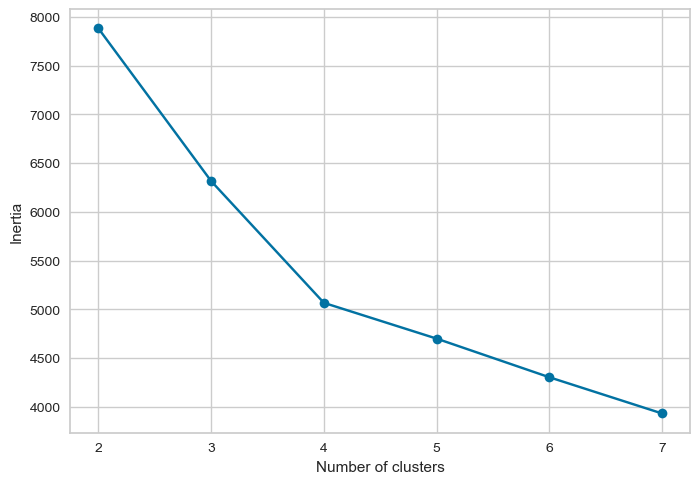

In [129]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 8)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# Model 2 - GMM

In [130]:
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

gmm_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('gmm', GaussianMixture(random_state=42))
])


In [131]:
bic_scores = []
aic_scores = []

for k in range(2, 8):
    gmm_pipe.set_params(gmm__n_components=k)
    gmm_pipe.fit(X)

    gmm = gmm_pipe.named_steps['gmm']
    bic_scores.append(gmm.bic(gmm_pipe[:-1].transform(X)))
    aic_scores.append(gmm.aic(gmm_pipe[:-1].transform(X)))

    print(f'k={k}, BIC={bic_scores[-1]:.0f}, AIC={aic_scores[-1]:.0f}')
    
    
# Lower BIC = better

# BIC penalizes too many clusters

# Usually smoother and safer than AIC

k=2, BIC=2341, AIC=2172
k=3, BIC=-3308, AIC=-3564
k=4, BIC=-15106, AIC=-15450
k=5, BIC=-15595, AIC=-16026
k=6, BIC=-16212, AIC=-16731
k=7, BIC=-16455, AIC=-17060


In [132]:
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    gmm_pipe.set_params(gmm__n_components=k)
    labels = gmm_pipe.fit_predict(X)

    X_transformed = gmm_pipe[:-1].transform(X)
    score = silhouette_score(X_transformed, labels)

    print(f'k={k}, silhouette={score:.3f}')

k=2, silhouette=0.212
k=3, silhouette=0.002
k=4, silhouette=-0.002
k=5, silhouette=0.001
k=6, silhouette=-0.001
k=7, silhouette=-0.009


# Model 3 - Hierarchical Clustering

In [133]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Preprocess (same logic, no leakage)
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)


In [134]:
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    agg = AgglomerativeClustering(
        n_clusters=k,
        linkage='ward'  # best for numeric risk data
    )
    labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)

    print(f'k={k}, silhouette={score:.3f}')


k=2, silhouette=0.618
k=3, silhouette=0.595
k=4, silhouette=0.301
k=5, silhouette=0.315
k=6, silhouette=0.304
k=7, silhouette=0.310


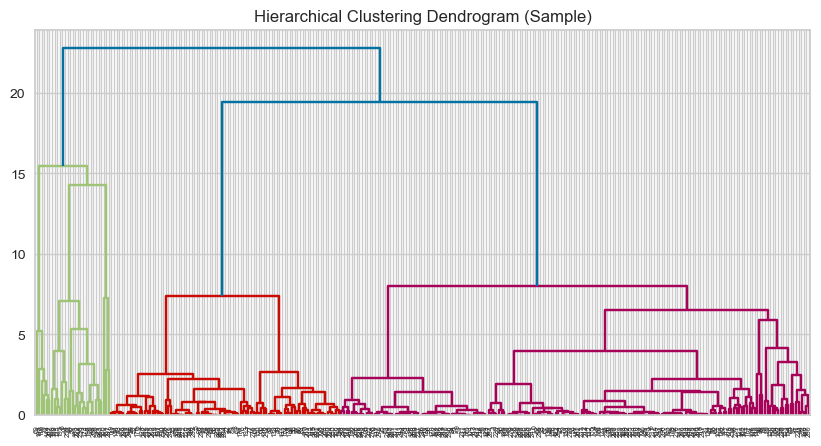

In [135]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

sample_idx = np.random.choice(len(X_scaled), size=300, replace=False)
Z = linkage(X_scaled[sample_idx], method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Sample)')
plt.show()


# Model 6 K-Prototypes

In [136]:
!pip install kmodes

Defaulting to user installation because normal site-packages is not writeable


In [137]:
import pandas as pd
from kmodes.kprototypes import KPrototypes

In [138]:
# Filter eligible customers
eligible_df_k = model_data[model_data['Eligibility_Flag'].str.upper() == 'ELIGIBLE'].copy()

In [139]:
eligible_df_k

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,AVG_TXN_PER_DAY,TRANSACTION_VOLATILITY,TOTAL_CAPITAL_DUE,TOTAL_INTEREST_DUE,AVG_PAYMENT_RATIO,MONTHEND_CONVERTED_BALANCE,UTILIZATION,OOD,DEFAULT,CREDIT_SCORE
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,4.133333,-20.008519,1071845.16,135138.47,-0.007552,265556.892955,1631.711847,0.0,0.0,715.0
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,0.000000,0.000000,0.00,0.00,0.000000,1253.765015,1228.765015,0.0,0.0,774.0
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.0,745.0
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,12.233333,-11.511144,-1354369.77,20821.79,0.000335,-173550.662476,2132.712500,0.0,0.0,718.0
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,0.000000,0.000000,0.00,0.00,0.000000,1386.209961,1386.209961,0.0,0.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,2.033333,-12.990641,0.00,0.00,0.000000,1288.880005,38014.878906,0.0,0.0,747.0
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,13.766667,-7.688549,0.00,0.00,0.000000,43944.810313,26681.476969,0.0,0.0,720.0
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,8.566667,-12.892953,0.00,0.00,0.000000,433638.140625,138343.642487,0.0,0.0,801.0
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,2.766667,-14.293284,0.00,0.00,0.000000,54540.488281,45595.488281,0.0,0.0,756.0


In [140]:
# Define features
numeric_features = ['Monthly_Avg_Balance', 'Avg_Monthly_Credit','AGE','CREDIT_SCORE']
categorical_features = ['OCCUPATION','CUSTOMER_RISK_NAME','GENDER', 'EMPLOYMENT_STATUS', 'MARITAL_STATUS','TARGET_DESC']

In [141]:
# Fill missing values
eligible_df_k[numeric_features] = eligible_df_k[numeric_features].fillna(0)
for col in categorical_features:
    eligible_df_k[col] = eligible_df_k[col].astype(str).fillna('Unknown')

In [142]:
cluster_data = eligible_df_k[numeric_features + categorical_features].copy()
cat_idx = [cluster_data.columns.get_loc(col) for col in categorical_features]

In [143]:
cluster_data

,Monthly_Avg_Balance,Avg_Monthly_Credit,AGE,CREDIT_SCORE,OCCUPATION,CUSTOMER_RISK_NAME,GENDER,EMPLOYMENT_STATUS,MARITAL_STATUS,TARGET_DESC
0,240032.314495,594627.180067,36,715.0,Entrepreneur / Business Owners,LOW,FEMALE,UNEMPLOYED,MARRIED,Signature
1,1288.532501,1288.532501,27,774.0,Garment & Related Trade Workers,LOW,FEMALE,EMPLOYED,SINGLE,Premier
2,0.000000,0.000000,41,745.0,Private Sector Non-Executives,LOW,FEMALE,EMPLOYED,Unknown,Essential
3,-42844.881154,406128.730574,25,718.0,Finance Professionals,LOW,FEMALE,EMPLOYED,Unknown,Essential
4,1377.552490,1377.552490,61,697.0,Entrepreneur / Business Owners,LOW,FEMALE,UNEMPLOYED,MARRIED,Signature
...,...,...,...,...,...,...,...,...,...,...
2497,5273.733337,84100.000000,39,747.0,Private Sector Executives,LOW,FEMALE,EMPLOYED,SINGLE,Essential
2498,26121.969971,418690.281250,34,720.0,Entrepreneur / Business Owners,MEDIUM,MALE,BUSINESS,SINGLE,Essential
2499,243207.672119,626505.000000,45,801.0,Entrepreneur / Business Owners,LOW,MALE,SELF-EMPLOYED,MARRIED,Essential
2500,64698.908854,32400.000000,29,756.0,Entrepreneur / Business Owners,LOW,FEMALE,SELF-EMPLOYED,MARRIED,Essential


In [144]:
# import matplotlib.pyplot as plt

# cost = []
# K = range(2, 10) 
#  # test 2 to 9 clusters

# for k in K:
#     kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
#     kproto.fit_predict(cluster_data, categorical=cat_idx)
#     cost.append(kproto.cost_)




In [145]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Prepare numeric + encoded categorical data
cluster_numeric = cluster_data.copy()
for col in categorical_features:
    cluster_numeric[col] = cluster_numeric[col].astype('category').cat.codes



In [146]:
# Define range of clusters to test
K = range(2, 9)

# Initialize lists to store metrics
cost = []
sil_scores = []
ch_scores = []

# Loop once per k and compute all metrics
for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
    labels = kproto.fit_predict(cluster_data.values, categorical=cat_idx)

    cost.append(kproto.cost_)
    sil_scores.append(silhouette_score(cluster_numeric, labels, metric='euclidean'))
    ch_scores.append(calinski_harabasz_score(cluster_numeric, labels))
    
  

In [147]:
print("K:", K)
print("Length of K:", len(K))
print("Cost:", cost)
print("Length of cost:", len(cost))


K: range(2, 9)
Length of K: 7
Cost: [1.0673512823066346e+16, 5660337302163727.0, 4250347316076593.5, 3720855201646420.5, 3439477903223653.0, 3238461844040633.5, 3086505679352179.5]
Length of cost: 7


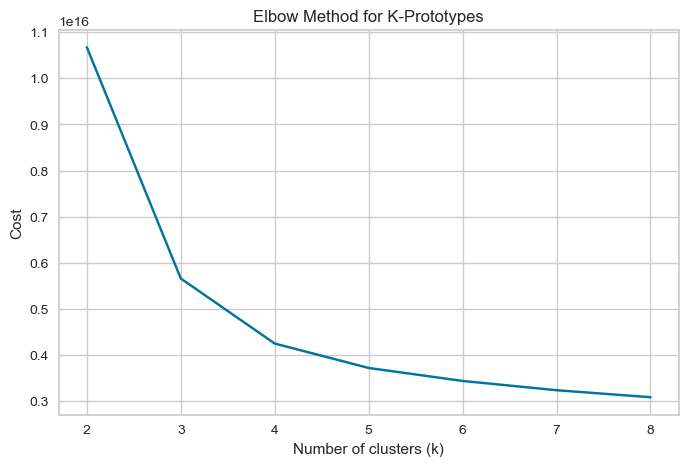

In [148]:
# Plot Elbow (Cost)
plt.figure(figsize=(8,5))
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for K-Prototypes')
plt.show()

In [149]:
!pip install kneed


from kneed import KneeLocator
import matplotlib.pyplot as plt

knee = KneeLocator(K, cost, curve='convex', direction='decreasing')
optimal_k = knee.knee

print("Optimal number of clusters (Elbow Method):", optimal_k)

Defaulting to user installation because normal site-packages is not writeable
Optimal number of clusters (Elbow Method): 4


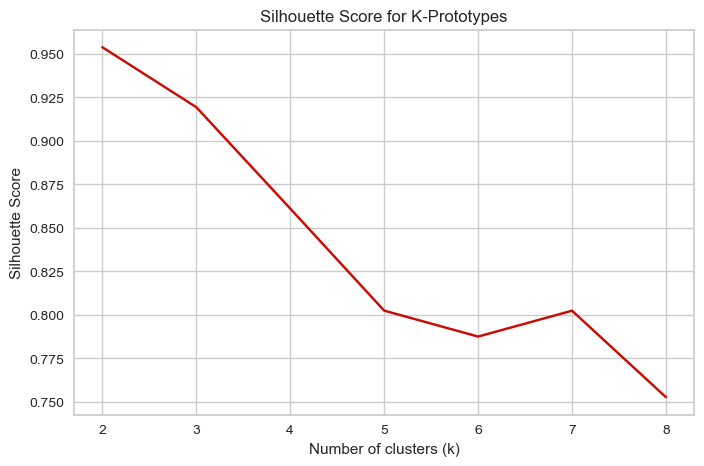

In [150]:
# Plot Silhouette Score
plt.figure(figsize=(8,5))
plt.plot(K, sil_scores, 'rx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Prototypes')
plt.show()

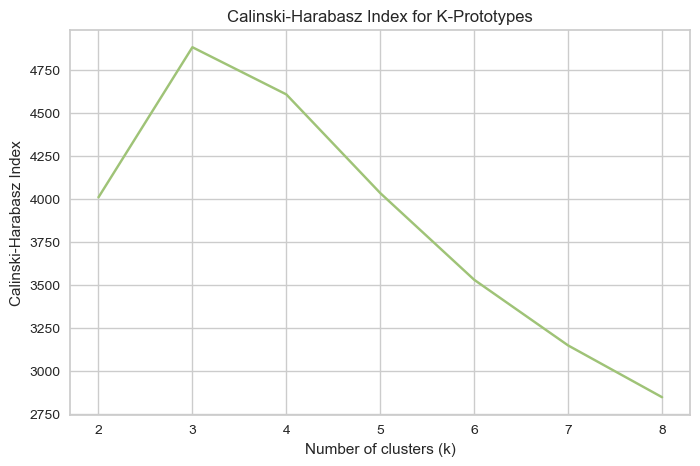

In [151]:
# Plot Calinski-Harabasz Index
plt.figure(figsize=(8,5))
plt.plot(K, ch_scores, 'gx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for K-Prototypes')
plt.show()


In [152]:
# Print all metrics per k
for i, k_val in enumerate(K):
    print(f"k={k_val} -> Cost: {cost[i]:.2f}, Silhouette: {sil_scores[i]:.4f}, CH: {ch_scores[i]:.2f}")

k=2 -> Cost: 10673512823066346.00, Silhouette: 0.9538, CH: 4009.70
k=3 -> Cost: 5660337302163727.00, Silhouette: 0.9193, CH: 4881.62
k=4 -> Cost: 4250347316076593.50, Silhouette: 0.8611, CH: 4607.51
k=5 -> Cost: 3720855201646420.50, Silhouette: 0.8025, CH: 4034.31
k=6 -> Cost: 3439477903223653.00, Silhouette: 0.7876, CH: 3530.77
k=7 -> Cost: 3238461844040633.50, Silhouette: 0.8024, CH: 3149.40
k=8 -> Cost: 3086505679352179.50, Silhouette: 0.7527, CH: 2848.73


In [153]:
# Copy cluster_data so we don't modify the original
cluster_numeric = cluster_data.copy()

for col in categorical_features:
    cluster_numeric[col] = cluster_numeric[col].astype('category').cat.codes


# Model 7 - Gower

In [154]:
!pip install gower


Defaulting to user installation because normal site-packages is not writeable


In [155]:
import pandas as pd
import numpy as np

# Select features
numeric_features = [
    'AGE',
    'Monthly_Avg_Balance',
    'Avg_Monthly_Credit','CREDIT_SCORE'
]


categorical_features = [
    'GENDER',
    'EMPLOYMENT_STATUS',
    'MARITAL_STATUS',
    'Employment_Segment','TARGET_DESC','CUSTOMER_RISK_NAME'
]

gower_df = model_data[
    model_data['Eligibility_Flag'].str.upper() == 'ELIGIBLE'
][numeric_features + categorical_features].copy()


# Handle missing values
gower_df[numeric_features] = gower_df[numeric_features].fillna(gower_df[numeric_features].median())
gower_df[categorical_features] = gower_df[categorical_features].fillna('Unknown')


In [156]:
import gower

gower_dist = gower.gower_matrix(gower_df)


In [157]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 4  

hc = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric='precomputed',
    linkage='average'
)

gower_df['Cluster'] = hc.fit_predict(gower_dist)


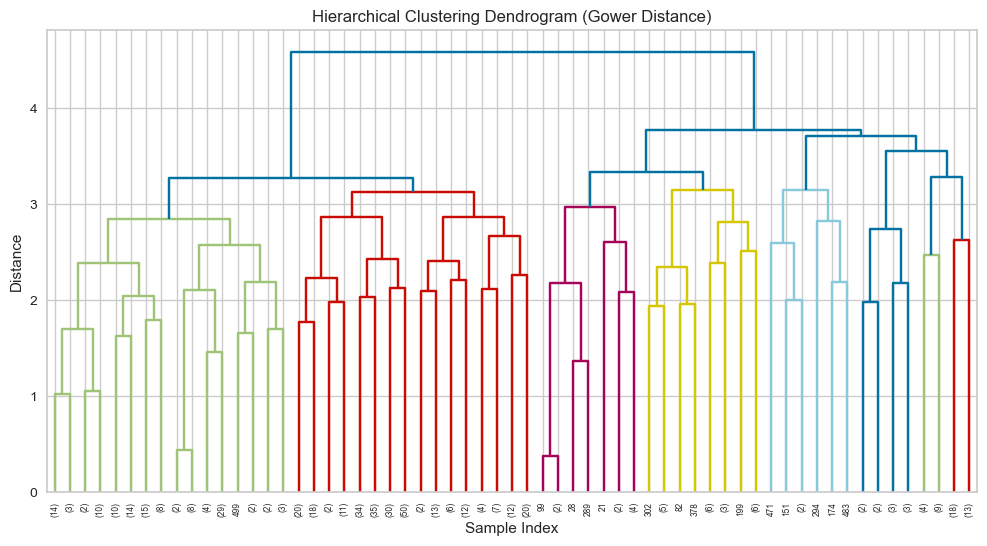

In [158]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

sample = gower_df.sample(n=500, random_state=42)
gower_sample = gower.gower_matrix(sample)

Z = linkage(gower_sample, method='average')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Gower Distance)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


In [159]:
gower_df.groupby('Cluster')[numeric_features].mean()


,AGE,Monthly_Avg_Balance,Avg_Monthly_Credit,CREDIT_SCORE
Cluster,,,,
0,36.629273,5.715909e+04,6.672509e+05,733.287467
1,67.311558,3.757245e+05,5.631350e+05,682.889447
2,43.666667,5.497050e+06,1.906042e+07,519.333333
3,50.111111,-6.890417e+05,1.583049e+05,641.444444


In [160]:
for col in categorical_features:
    print(f"\n{col}")
    print(pd.crosstab(gower_df['Cluster'], gower_df[col], normalize='index'))



GENDER
GENDER     FEMALE      MALE
Cluster                    
0        0.380368  0.619632
1        0.417085  0.582915
2        1.000000  0.000000
3        0.444444  0.555556

EMPLOYMENT_STATUS
EMPLOYMENT_STATUS  BUSINESS  EMPLOYED  FREELANCE   RETIRED  SELF-EMPLOYED  \
Cluster                                                                     
0                  0.098160  0.450044   0.003067  0.000438       0.366345   
1                  0.100503  0.236181   0.000000  0.140704       0.371859   
2                  0.000000  1.000000   0.000000  0.000000       0.000000   
3                  0.000000  0.000000   0.000000  1.000000       0.000000   

EMPLOYMENT_STATUS   STUDENT  UNEMPLOYED   Unknown  
Cluster                                            
0                  0.030675    0.046889  0.004382  
1                  0.000000    0.145729  0.005025  
2                  0.000000    0.000000  0.000000  
3                  0.000000    0.000000  0.000000  

MARITAL_STATUS
MARITAL_STATUS

# comparing each model

In [161]:
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical features
encoded_df = pd.get_dummies(cluster_data, drop_first=True)

# Scale numeric features
scaler = StandardScaler()
encoded_df[numeric_features] = scaler.fit_transform(encoded_df[numeric_features])

# Convert to numpy array for metrics
X_encoded = encoded_df.values

print("X_encoded rows:", len(X_encoded))


X_encoded rows: 2493


In [162]:
k = 4

# K-Prototypes
kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
kproto_labels = kproto.fit_predict(cluster_data.values, categorical=cat_idx)
sil_kproto = silhouette_score(X_encoded, kproto_labels, metric='euclidean')

# Gower
hc = AgglomerativeClustering(n_clusters=k, metric='precomputed', linkage='average')
gower_labels = hc.fit_predict(gower_dist)
sil_gower = silhouette_score(gower_dist, gower_labels, metric='precomputed')

print("Silhouette K-Prototypes:", sil_kproto)
print("Silhouette Gower:", sil_gower)


Silhouette K-Prototypes: 0.25676229316464666
Silhouette Gower: 0.19770792


In [163]:
# CH Scores
from sklearn.metrics import calinski_harabasz_score
ch_kproto = calinski_harabasz_score(X_encoded, kproto_labels)
ch_gower = calinski_harabasz_score(X_encoded, gower_labels)

print("Calinski-Harabasz K-Prototypes:", ch_kproto)
print("Calinski-Harabasz Gower:", ch_gower)


Calinski-Harabasz K-Prototypes: 154.56760010942125
Calinski-Harabasz Gower: 80.18325853681282


In [164]:
from sklearn.metrics import davies_bouldin_score

# Davies–Bouldin for K-Prototypes
db_kproto = davies_bouldin_score(X_encoded, kproto_labels)
print("Davies–Bouldin Index (K-Prototypes):", db_kproto)

# Davies–Bouldin for Gower clusters
db_gower = davies_bouldin_score(X_encoded, gower_labels)
print("Davies–Bouldin Index (Gower + Agglomerative):", db_gower)


Davies–Bouldin Index (K-Prototypes): 2.0852367783810815
Davies–Bouldin Index (Gower + Agglomerative): 1.7510938606358533


In [165]:
from sklearn.metrics import adjusted_rand_score

# Assuming you already have:
# kproto_labels -> cluster labels from K-Prototypes
# gower_labels  -> cluster labels from Gower + Agglomerative

# Compute ARI
ari_score = adjusted_rand_score(kproto_labels, gower_labels)

print("Adjusted Rand Index (K-Prototypes vs Gower):", ari_score)


Adjusted Rand Index (K-Prototypes vs Gower): 0.012871222729035717


# Chosing K prototype

In [166]:
from kmodes.kprototypes import KPrototypes
import pandas as pd

# Use a separate copy for final clustering
eligible_final = model_data[model_data['Eligibility_Flag'].str.upper() == 'ELIGIBLE'].copy()

In [167]:
eligible_final

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,AVG_TXN_PER_DAY,TRANSACTION_VOLATILITY,TOTAL_CAPITAL_DUE,TOTAL_INTEREST_DUE,AVG_PAYMENT_RATIO,MONTHEND_CONVERTED_BALANCE,UTILIZATION,OOD,DEFAULT,CREDIT_SCORE
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,4.133333,-20.008519,1071845.16,135138.47,-0.007552,265556.892955,1631.711847,0.0,0.0,715.0
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,0.000000,0.000000,0.00,0.00,0.000000,1253.765015,1228.765015,0.0,0.0,774.0
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.0,745.0
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,12.233333,-11.511144,-1354369.77,20821.79,0.000335,-173550.662476,2132.712500,0.0,0.0,718.0
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,0.000000,0.000000,0.00,0.00,0.000000,1386.209961,1386.209961,0.0,0.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,2.033333,-12.990641,0.00,0.00,0.000000,1288.880005,38014.878906,0.0,0.0,747.0
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,13.766667,-7.688549,0.00,0.00,0.000000,43944.810313,26681.476969,0.0,0.0,720.0
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,8.566667,-12.892953,0.00,0.00,0.000000,433638.140625,138343.642487,0.0,0.0,801.0
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,2.766667,-14.293284,0.00,0.00,0.000000,54540.488281,45595.488281,0.0,0.0,756.0


In [168]:
# Define features
numeric_feats_final = ['Monthly_Avg_Balance', 'Avg_Monthly_Credit','AGE','CREDIT_SCORE']
categorical_feats_final = ['OCCUPATION','CUSTOMER_RISK_NAME','GENDER', 
                           'EMPLOYMENT_STATUS', 'MARITAL_STATUS','TARGET_DESC']

In [169]:
# Fill missing values
eligible_final[numeric_feats_final] = eligible_final[numeric_feats_final].fillna(0)
for col in categorical_feats_final:
    eligible_final[col] = eligible_final[col].astype(str).fillna('Unknown')

In [170]:
# Prepare cluster data
cluster_data_final = eligible_final[numeric_feats_final + categorical_feats_final].copy()
cat_idx_final = [cluster_data_final.columns.get_loc(col) for col in categorical_feats_final]

In [171]:
# Fit K-Prototypes with k = 4
kproto_final = KPrototypes(n_clusters=4, init='Cao', random_state=42)
cluster_labels_final = kproto_final.fit_predict(cluster_data_final.values, categorical=cat_idx_final)

In [172]:
# Assign cluster labels to dataframe
eligible_final['Cluster_KProto'] = cluster_labels_final

In [173]:
# # Encode categorical columns as numeric (optional, for metrics)
# cluster_numeric_final = cluster_data_final.copy()
# for col in categorical_feats_final:
#     cluster_numeric_final[col] = cluster_numeric_final[col].astype('category').cat.codes


In [174]:
# Show cluster sizes
cluster_sizes_final = eligible_final['Cluster_KProto'].value_counts().sort_index()
print("Cluster sizes (k=4):")
print(cluster_sizes_final)

Cluster sizes (k=4):
0    2345
1     113
2      25
3      10
Name: Cluster_KProto, dtype: int64


In [175]:
cluster_summary_list = []

for cluster in eligible_final['Cluster_KProto'].unique():
    cluster_data = eligible_final[eligible_final['Cluster_KProto'] == cluster]
    
    summary = {}
    summary['Cluster'] = cluster
    
    # Numeric features: mean
    for col in numeric_feats_final:
        summary[col] = round(cluster_data[col].mean(), 2)
    
    # Categorical features: top category + percentage
    for col in categorical_feats_final:
        top_cat = cluster_data[col].value_counts(normalize=True).idxmax()
        top_pct = round(cluster_data[col].value_counts(normalize=True).max() * 100, 1)
        summary[col] = f"{top_cat} ({top_pct}%)"
    
    cluster_summary_list.append(summary)

# Convert to DataFrame
cluster_summary_df = pd.DataFrame(cluster_summary_list)




In [176]:
# Show table
cluster_summary_df

,Cluster,Monthly_Avg_Balance,Avg_Monthly_Credit,AGE,CREDIT_SCORE,OCCUPATION,CUSTOMER_RISK_NAME,GENDER,EMPLOYMENT_STATUS,MARITAL_STATUS,TARGET_DESC
0,0,37875.66,172658.16,38.87,723.68,Entrepreneur / Business Owners (50.8%),LOW (81.8%),MALE (60.2%),EMPLOYED (43.5%),MARRIED (41.5%),Essential (69.1%)
1,1,684142.22,4435669.81,43.35,794.48,Entrepreneur / Business Owners (51.3%),LOW (65.5%),MALE (83.2%),EMPLOYED (39.8%),MARRIED (54.0%),Essential (54.9%)
2,2,1095086.70,15210935.46,45.52,831.00,Entrepreneur / Business Owners (64.0%),LOW (60.0%),MALE (88.0%),BUSINESS (44.0%),MARRIED (56.0%),Summit (52.0%)
3,3,2199234.50,40694904.76,38.60,900.00,Entrepreneur / Business Owners (40.0%),MEDIUM (60.0%),MALE (80.0%),EMPLOYED (50.0%),SINGLE (40.0%),Summit (50.0%)


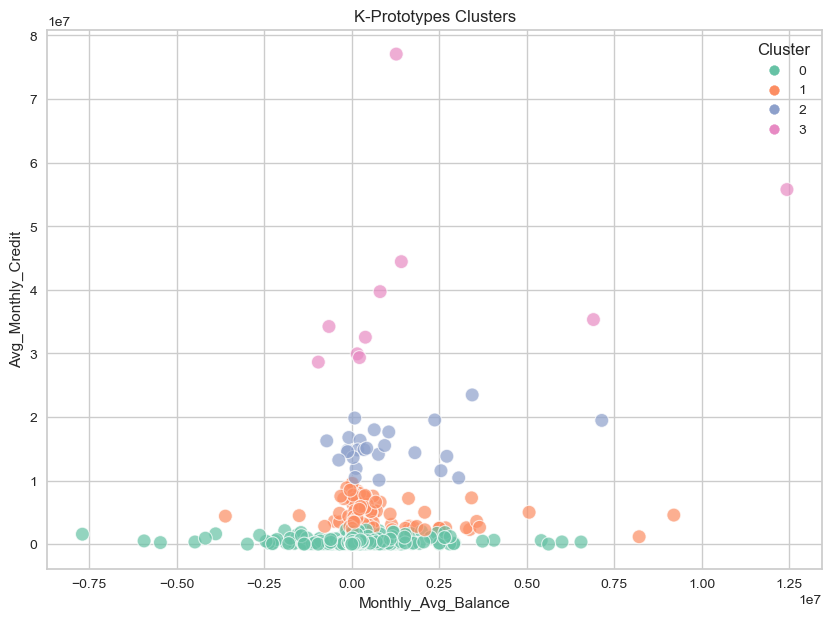

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose two numeric features for the scatter plot
x_feature = 'Monthly_Avg_Balance'
y_feature = 'Avg_Monthly_Credit'

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=eligible_final,
    x=x_feature,
    y=y_feature,
    hue='Cluster_KProto',        # color by cluster
    palette='Set2',              # different colors
    s=100,                       # marker size
    alpha=0.7                     # transparency
)

plt.title('K-Prototypes Clusters')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [178]:
# 6️⃣ PCA for 2D Visualization (numeric only)
# -------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(eligible_final[numeric_feats_final])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

eligible_final['PCA1'] = X_pca[:,0]
eligible_final['PCA2'] = X_pca[:,1]

NameError: name 'PCA' is not defined

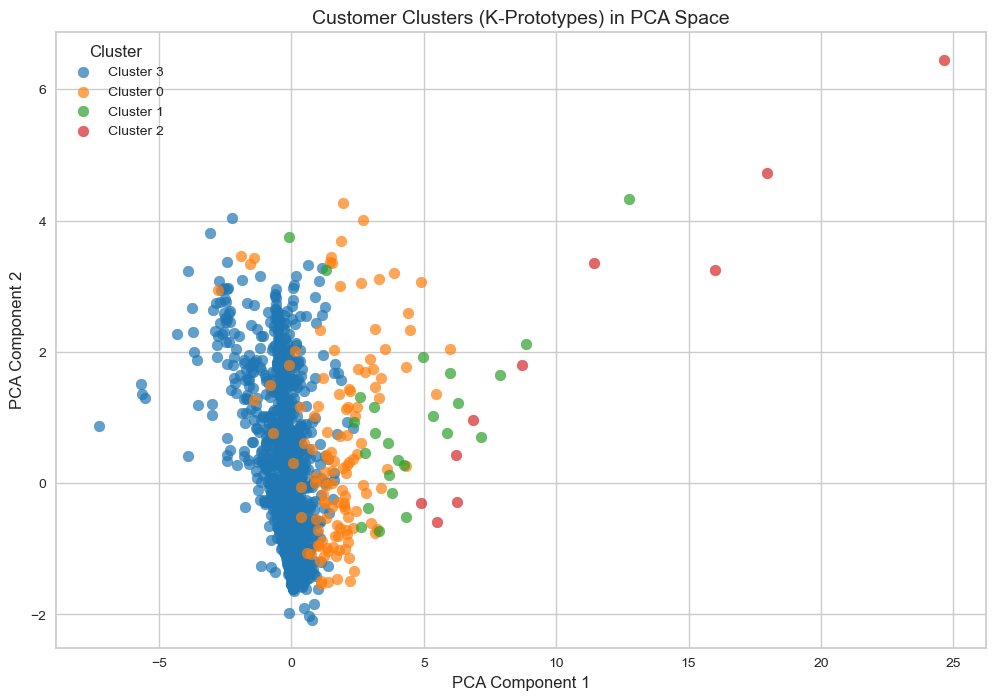

In [ ]:
#Scatter Plot: Clusters Highlighted
# -------------------------
plt.figure(figsize=(12,8))
clusters = eligible_final['Cluster_KProto'].unique()
colors = sns.color_palette('tab10', n_colors=len(clusters))

for i, c in enumerate(clusters):
    subset = eligible_final[eligible_final['Cluster_KProto'] == c]
    plt.scatter(subset['PCA1'], subset['PCA2'], s=60, alpha=0.7, label=f'Cluster {c}', color=colors[i])

plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.title('Customer Clusters (K-Prototypes) in PCA Space', fontsize=14)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

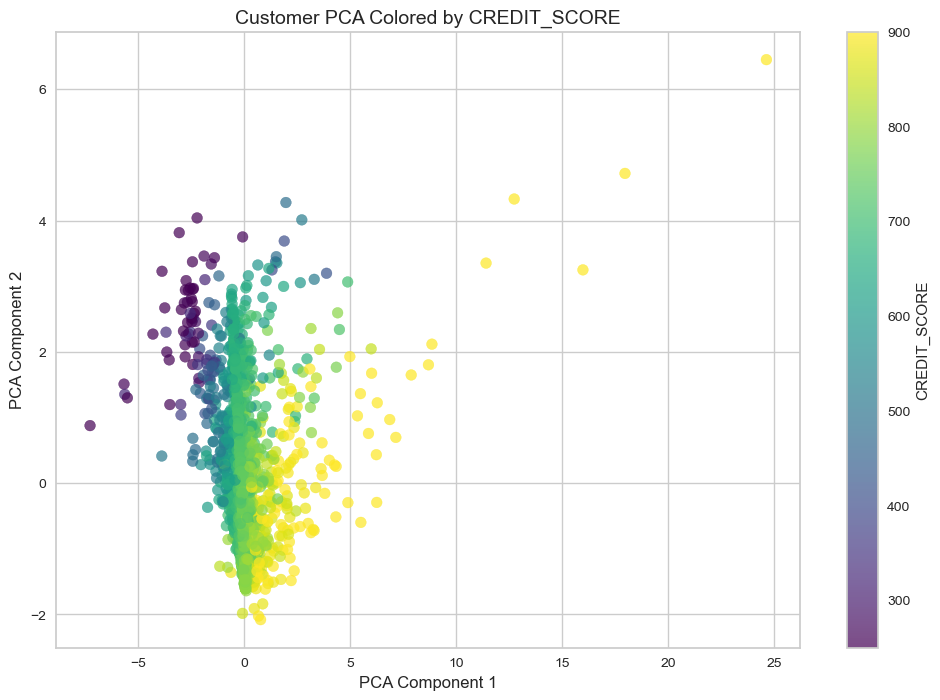

In [ ]:
# 8️⃣ Optional: Scatter colored by CREDIT_SCORE
# -------------------------
plt.figure(figsize=(12,8))
scatter = plt.scatter(
    eligible_final['PCA1'],
    eligible_final['PCA2'],
    c=eligible_final['CREDIT_SCORE'],
    cmap='viridis',
    s=60,
    alpha=0.7
)
plt.colorbar(scatter, label='CREDIT_SCORE')
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.title('Customer PCA Colored by CREDIT_SCORE', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# Assume kproto is your trained KPrototypes model
centroids = kproto.cluster_centroids_

In [ ]:
centroids

array([['1971071.6712004014', '4161881.851159722', '45.443548387096776',
        '782.8548387096774', 'Entrepreneur / Business Owners', 'LOW',
        'MALE', 'EMPLOYED', 'MARRIED', 'Essential'],
       ['2796516.382781358', '15210935.461035032', '45.52', '831.56',
        'Entrepreneur / Business Owners', 'LOW', 'MALE', 'BUSINESS',
        'MARRIED', 'Summit'],
       ['5249926.031379169', '40694904.76095231', '38.6', '900.0',
        'Entrepreneur / Business Owners', 'MEDIUM', 'MALE', 'EMPLOYED',
        'MARRIED', 'Summit'],
       ['30236.65189820025', '178603.07688082624', '38.73436161096829',
        '724.1263924592973', 'Entrepreneur / Business Owners', 'LOW',
        'MALE', 'EMPLOYED', 'MARRIED', 'Essential']], dtype='<U32')

In [ ]:
import numpy as np

numeric_columns = ['Monthly_Avg_Balance', 'Avg_Monthly_Credit', 'AGE', 'CREDIT_SCORE']
categorical_columns = ['OCCUPATION','CUSTOMER_RISK_NAME','GENDER', 'EMPLOYMENT_STATUS', 'MARITAL_STATUS','TARGET_DESC']

In [ ]:
import numpy as np

numeric_columns = ['Monthly_Avg_Balance', 'Avg_Monthly_Credit', 'AGE', 'CREDIT_SCORE']
categorical_columns = ['OCCUPATION','CUSTOMER_RISK_NAME','GENDER', 
                       'EMPLOYMENT_STATUS', 'MARITAL_STATUS','TARGET_DESC']

# Ensure numeric columns in eligible_final are float
eligible_final[numeric_columns] = eligible_final[numeric_columns].astype(float)

# cluster centroids split properly
centroid_numeric = np.array(kproto.cluster_centroids_[0][cluster_num], dtype=float)
centroid_categorical = np.array(kproto.cluster_centroids_[1][cluster_num])

# get cluster 2 indices
cluster_indices = np.where(clusters == cluster_num)[0]
cluster_points = eligible_final.iloc[cluster_indices]

distances = []
for i, row in cluster_points.iterrows():
    # numeric Euclidean distance
    num_dist = np.linalg.norm(row[numeric_columns].values.astype(float) - centroid_numeric)
    
    # categorical Hamming distance
    cat_dist = sum(row[categorical_columns].values != centroid_categorical)
    
    total_dist = num_dist + cat_dist
    distances.append(total_dist)

# identify outlier
outlier_index = cluster_indices[np.argmax(distances)]
outlier_point = eligible_final.iloc[outlier_index]

print("Outlier in Cluster 2:\n", outlier_point)

Outlier in Cluster 2:
 MASKED_ID                                                                001538
NAME_MASKED_ID                                                     CUSTOMER_899
AGE                                                                        25.0
GENDER                                                                   FEMALE
CUSTOMER_RISK                                                               1.0
CUSTOMER_RISK_NAME                                                          LOW
OCCUPATION                                                Finance Professionals
DISTRICT                                                                  GALLE
TARGET_CODE                                                                 988
TARGET_DESC                                                           Essential
MARITAL_STATUS                                                          Unknown
DATE_OF_BIRTH                                                        2000-03-23
EMPLOYMENT_STATUS